In [3]:
from pandas import read_csv
A = read_csv("C:/Users/Baccchi/Downloads/Cars93.csv")

In [4]:
A.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [5]:
import pandas as pd
Q = pd.DataFrame(A.corr())

In [6]:
Q[["Price"]].sort_values(by="Price")

,Price
MPG.city,-0.594562
MPG.highway,-0.560680
Rev.per.mile,-0.426395
Unnamed: 0,-0.137277
RPM,-0.004955
Passengers,0.057860
Rear.seat.room,0.311499
Luggage.room,0.366569
Turn.circle,0.392590
Width,0.456028


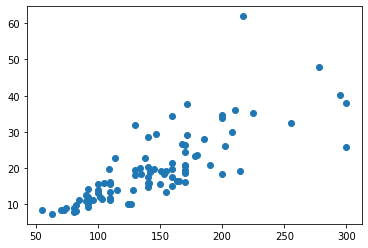

In [7]:
import matplotlib.pyplot as plt
plt.scatter(A.Horsepower,A.Price)

In [98]:
Y = A[["Price"]]
X = A[["Horsepower","Weight","Width"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=22)

C:\Users\Baccchi\anaconda3\envs\Machine_Learning_Class\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Baccchi\anaconda3\envs\Machine_Learning_Class\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

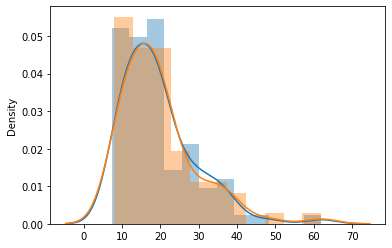

In [99]:
import seaborn as sb
sb.distplot(Y)
sb.distplot(ytrain)

In [100]:
xtrain.head()


,Horsepower,Weight,Width
22,92,2270,66
72,74,2350,66
89,134,2985,67
79,73,2045,60
53,103,2440,66


In [101]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)

In [102]:
#Prediction results on unseen data
pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
print("Test/Validation Error: %.2f"%mean_absolute_error(ytest,pred))

Test/Validation Error: 3.26


In [103]:
#Prediction results on seen data
pred = model.predict(xtrain)
from sklearn.metrics import mean_absolute_error
print("Training Error: %.2f"%mean_absolute_error(ytrain,pred))

Training Error: 3.67


In [104]:
cat=[]
con=[]
for i in A.columns:
    if(A[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [105]:
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

C:\Users\Baccchi\anaconda3\envs\Machine_Learning_Class\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='Price'>

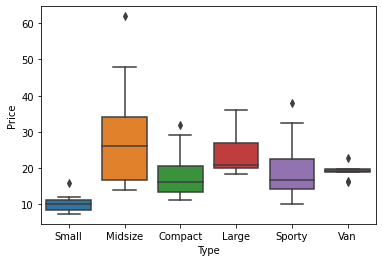

In [106]:
sb.boxplot(A.Type,A.Price)

In [112]:
!pip install statsmodels

In [114]:
from statsmodels.api import OLS
from statsmodels.formula.api import ols
model = ols("Price ~ Type",A).fit()
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(model)
Q = pd.DataFrame(anova_results)
a = Q['PR(>F)']['Type']
print("%.40f"%a)

0.0000000147699903566453211937538312378652


In [115]:
from statsmodels.api import OLS
from statsmodels.formula.api import ols
model = ols("Price ~ Manufacturer",A).fit()
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(model)
Q = pd.DataFrame(anova_results)
a = Q['PR(>F)']['Manufacturer']
print("%.40f"%a)

0.0000010794856854600706613236341807615659


In [116]:
from statsmodels.api import OLS
from statsmodels.formula.api import ols
model = ols("Price ~ Cylinders",A).fit()
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(model)
Q = pd.DataFrame(anova_results)
a = Q['PR(>F)']['Cylinders']
print("%.40f"%a)

0.0000000003042776105990461754841064057314


In [118]:
from statsmodels.api import OLS
from statsmodels.formula.api import ols
model = ols("Price ~ Cylinders",A).fit()
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(model)
Q = pd.DataFrame(anova_results)
a = Q['PR(>F)']['Cylinders']
print("%.40f"%a)

0.0000000003042776105990461754841064057314


C:\Users\Baccchi\anaconda3\envs\Machine_Learning_Class\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Origin', ylabel='Price'>

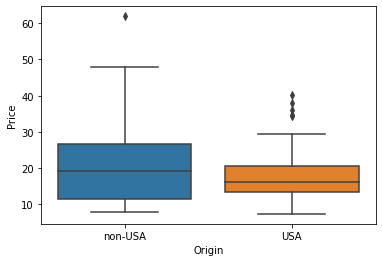

In [119]:
sb.boxplot(A.Origin,A.Price)

In [120]:
from statsmodels.formula.api import ols
model = ols("Price ~ Cylinders",A).fit()
from statsmodels.stats.anova import anova_lm
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Cylinders,5.0,3881.675216,776.335043,14.363288,3.042776e-10
Residual,87.0,4702.346074,54.049955,NaN,NaN
